In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset

In [ ]:
train = pd.read_csv("/content/train_loan.csv")
test = pd.read_csv("/content/test_loan.csv")

data analysis

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train.shape

(614, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


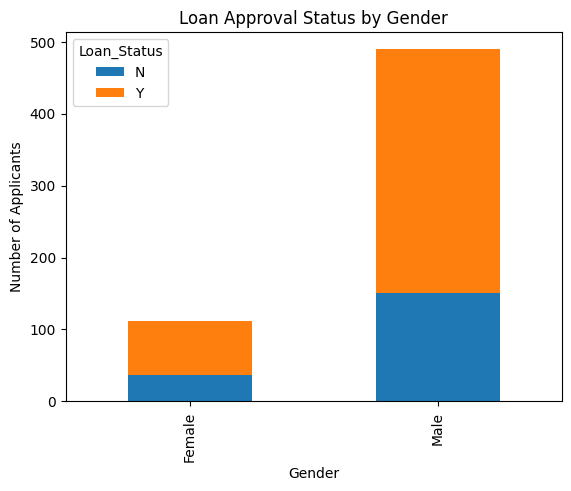

In [ ]:
gender_loan_status = train.groupby(['Gender', 'Loan_Status']).size().unstack()
gender_loan_status.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Loan Approval Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.show()

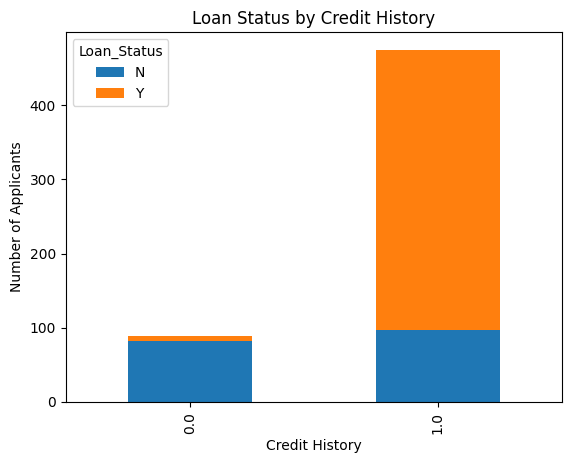

In [ ]:
credit_loan_status = train.groupby(['Credit_History', 'Loan_Status']).size().unstack()
credit_loan_status.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.show()

Missing value handling

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

Handling missing values in categorical features by imputation using mode. Following are the categorical columns:


*   Gender
*   Married
*   Self_Employed
*   Credit_History
*   Dependents





In [ ]:
for col in ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Dependents']:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [ ]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in the `Loan_Amount_Term` variable, the value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now, for the numerical feature `LoanAmount` let us use median imputatation to handle the missing values.



In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing value handling (Test Data)

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
for col in ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Dependents']:
    test[col].fillna(test[col].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Outlier detection

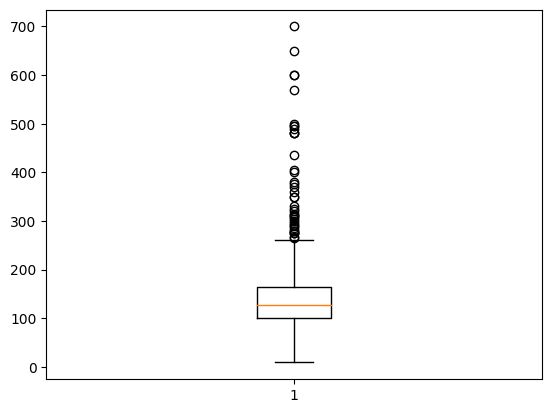

In [ ]:
plt.boxplot(train['LoanAmount'])
plt.show()

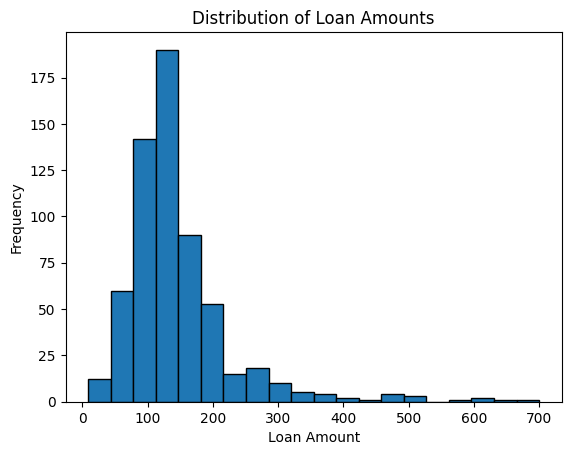

In [ ]:

plt.hist(train['LoanAmount'], bins=20, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

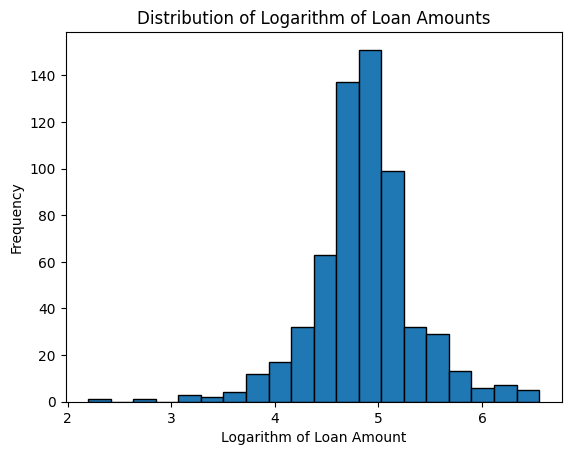

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
plt.hist(train['LoanAmount_log'], bins=20, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Logarithm of Loan Amounts')
plt.xlabel('Logarithm of Loan Amount')
plt.ylabel('Frequency')
plt.show()

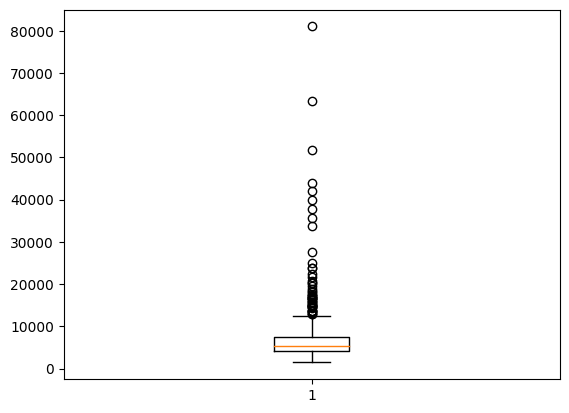

In [ ]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

plt.boxplot(train['TotalIncome'])
plt.show()

In [ ]:
train['TotalIncome_log']=np.log(train['TotalIncome'])
test['TotalIncome_log']=np.log(test['TotalIncome'])

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

In [ ]:
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in category:
  train[i] = encoder.fit_transform(train[i])

train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [ ]:
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for i in category:
  test[i] = encoder.fit_transform(test[i])

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [ ]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome_log']
train[numerical_cols] = standard_scaler.fit_transform(train[numerical_cols])

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1,-0.010533,5849.0,0.008468
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0,-0.010533,6091.0,0.082903
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1,-1.347068,3000.0,-1.217363
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1,-0.140758,4941.0,-0.301273
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1,0.184647,6000.0,0.055266


In [ ]:
test[numerical_cols] = standard_scaler.fit_transform(test[numerical_cols])